# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "01_Analysis.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="01_Analysis.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "01_Analysis.ipynb"
```

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

/home/jwow/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. The class is conveniently stored in the `class` column. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the some words out of 61,000 that had highest mutual information. For very sophisticated technical reasons (which you should know!) 1 was added to all the word counts in part 1. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

**Hint**: The data was preprocessed by a very busy PhD student... and hence should never be taken to be perfect at face value!

## 1. Exploration of the dataset

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [10 marks] ==========

1. [Code] Load the dataset `raw_20news.csv` into a data-frame called `news_raw`. Using pandas methods we learnt in class, extract some basic information about the data. 

1. [Text] In a short paragraph, summarise the key features of the dataset. *Hint: Look at what we did in the labs.*

In [2]:
news_raw = pd.read_csv(os.path.join('datasets', 'raw_20news.csv'))
news_raw.info()
news_raw.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


- 2129 entries
- 521 columns
    - 520 words
    - 1 class
- type: int64
- mem usage: 8.5 MB

### ========== Question 1.2 ---  [6 marks] ==========
1. [Code] Display the names of some of the attributes in the training datset. 
1. [Text] Describe the output and comment (1 or 2 sentences) keeping in mind the selection procedure for the features.

In [3]:
news_raw.T.head(8)    # transpose beforehand to select first 8 attributes

,0,1,2,3,4,5,6,7,8,9,...,2247,2248,2249,2250,2251,2252,2253,2254,2255,2256
w1_aaa,1,1,1,1,1,1,1,1,1,1,...,1,506,1,1,1,1,1,1,1,1
w2_pins,1,1,1,1,1,1,1,1,1,1,...,1,124,1,1,1,1,1,1,1,1
w3_kmr,1,1,1,1,1,1,1,1,1,1,...,1,381,1,1,1,1,1,1,1,1
w4_notion,1,1,1,1,1,1,1,1,1,1,...,1,290,1,1,1,1,1,1,1,1
w5_queens,1,1,1,1,1,1,2,1,1,1,...,1,298,1,1,1,1,1,1,1,1
w6_dwyer,1,1,1,1,1,1,1,1,1,1,...,1,167,1,1,1,1,1,1,1,1
w7_defenseman,1,1,1,1,1,1,1,1,1,1,...,1,399,1,1,3,1,1,1,1,1
w8_gld,1,1,1,1,1,1,1,1,1,1,...,1,525,1,1,1,1,1,1,1,1


- very even distribution of '1's, or non-occurrences given the description of the dataset includes a '+1' compensation for zero values
- outlier visible in row 2248 --> large amount of occurrences, unlikely
---
- these features must be the ones which most directly associate with a class to have been selected (highest mutual information)
- e.g. 'defenseman' likely has to do with sports, so its occurrence points most directly to sports

### ========== Question 1.3 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. 

1. [Code] Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for the raw dataset. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency to better visualise your model). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise. 
 ***N.B.*** *If for some reason, the alpha parameter does not work for you, then ignore it.*

1. [Text] Mention anything peculiar you observe in the Data.

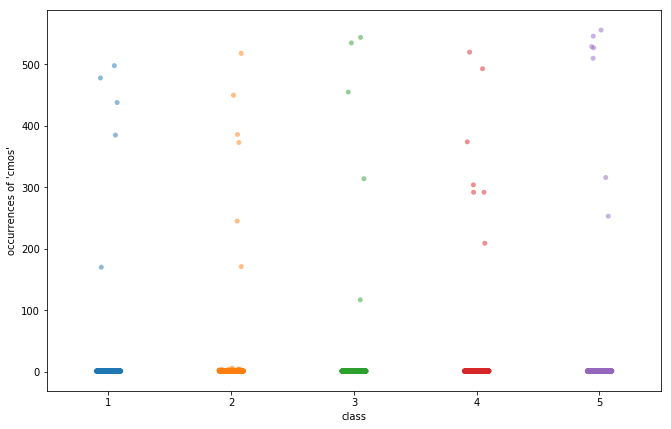

In [4]:
plt.figure(figsize=(11, 7))    # increase plot size
word_cmos = 'w101_cmos'
sns.stripplot(x=news_raw['class'], y=news_raw[word_cmos], jitter=True, alpha=0.5)
plt.ylabel("occurrences of 'cmos'")
plt.show()

- the majority of occurrences of the feature 'cmos' in a document are near the value '1', or 'does not occur'
- other times, when there are over 100 word occurrences, there seems to be no correlation between the class --> these look like possible outliers (unless 'cmos' were mentioned in an atheism document over 500 times, which seems unlikely)

### ========== Question 1.4  --- [8 marks] ==========
Let us analyse this further. The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of jitter into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. For this, you will be using the function `scatter_jitter` from the `utils` library which we provided. This function takes as input two numpy arrays containing the features of interest. 

1. [Code] First, pick two attributes of your choice from `news_raw` and use the provided function to plot their joint distribution. Do this twice (i.e. pick 4 attributes and do plots between two pairs: you do not need to plot between each possible pair). You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2. Label the axes appropriately.

1. [Text] Do these plots increase or reduce the possibility of the data-set containing outliers? Why or why not? How would you visualise the data to verify this? **N.B. There is no need to code anything for this part, just indicate a reasonable type of plot, and what you expect to see.**

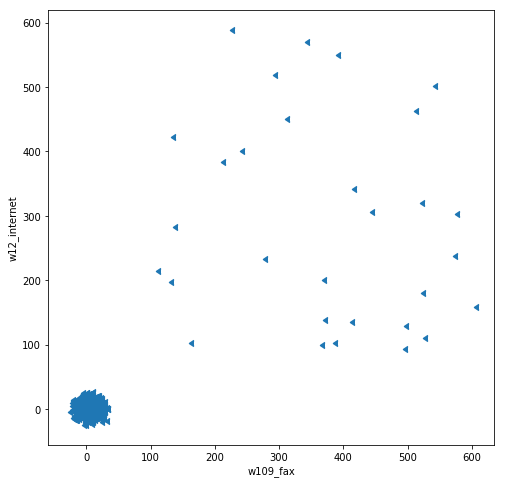

In [5]:
plt.figure(figsize=(8, 8))    # increase plot size

word_fax, word_internet = 'w109_fax', 'w12_internet'

plt.xlabel(word_fax)
plt.ylabel(word_internet)
# scatter_jitter(news_raw['w100_pitched'], news_raw['w119_run'])
scatter_jitter(news_raw[word_fax], news_raw[word_internet])

- these plots indicate outliers in the data since, realistically, very few texts will have this many occurrences of a single word, let alone both of them
- in order to verify this further, employing a 2D box plot may be a good way to show that these points are well outside the norm of the distribution of the data

### ========== Question 1.5 --- [15 marks] ==========
We want to get rid of the potential outliers in the data. Your job now is to create a new dataset from `news_raw` (name it `news_clean`) and remove the outliers.

1. [Text] Decide on a criterion to find the outliers and argue why it is reasonable. 
1. [Code] Then implement it and visualise the result (in terms of your criterion). **Be careful** not to alter the original dataset as we will need it later. 
1. [Text] Finally report the number of documents in the cleaned dataset, and the number rejected as outliers and comment on the result

- keep data up to 2 std devs from the mean (to be representative of ~95% of the data)
- it is reasonable to assume a normal distribution, therefore using the pandas values for mean and std, this calculation is fairly straightforward to execute


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,...,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000
mean,1.025825,1.014825,1.014825,1.007652,1.006217,1.010521,1.013391,1.024390,1.012434,1.080344,...,4.572932,4.469632,4.534194,4.562410,4.532759,4.512195,4.510760,4.521282,4.410330,3.094692
std,0.280640,0.158553,0.172985,0.106886,0.078622,0.134429,0.190222,0.274739,0.154171,0.460134,...,2.283457,2.273923,2.331017,2.292134,2.334319,2.259106,2.288781,2.298304,2.295819,1.393637
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,6.000000,4.000000
max,8.000000,5.000000,5.000000,4.000000,2.000000,4.000000,7.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


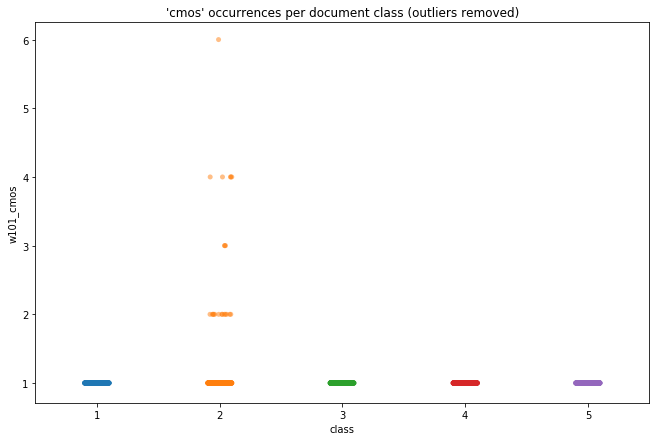

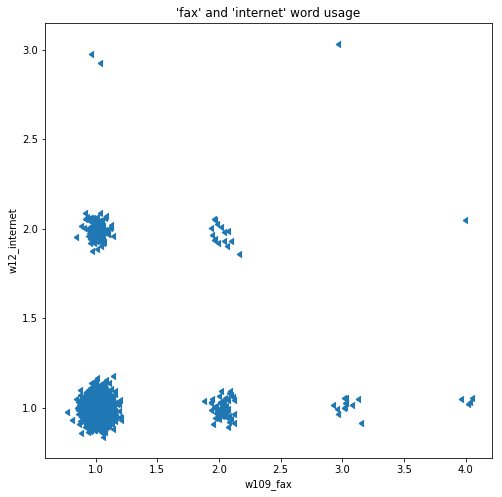

In [6]:
desc = news_raw.describe().T                                        # get stats from raw set

mean, std = desc['mean'], desc['std']                               # grab mean and std
std_range = 2
lo, hi = mean - std_range * std, mean + std_range * std             # set range to exclude data from

news_clean = news_raw[(lo < news_raw) & (news_raw < hi)].dropna()   # grab raw data in range, drop rows with NaN
display(news_clean.describe())

# --- plot as before
word_fax, word_internet = 'w109_fax', 'w12_internet'

plt.figure(figsize=(11, 7))    # increase plot size
sns.stripplot(x=news_clean['class'], y=news_clean[word_cmos], jitter=True, alpha=0.5)
plt.title("'cmos' occurrences per document class (outliers removed)")
plt.show()

plt.figure(figsize=(8, 8))    # increase plot size
plt.xlabel(word_fax)
plt.ylabel(word_internet)
plt.title("'fax' and 'internet' word usage")
# scatter_jitter(news_raw['w100_pitched'], news_raw['w119_run'])
scatter_jitter(news_clean[word_fax], news_clean[word_internet])

- points:
 - `2129` - before
 - `2091` - after
 - `38` rejected datapoints - `0.0178%` of data rejected
- result: very little data rejected, shows how much a very small percentage of outliers were influencing the statistics

### ========== Question 1.6 --- (LEVEL 11) --- [10 marks] ==========

1. [Code] Visualise some of the outlier documents and some of the inlier ones. 
1. [Text] Comment on the observations. Also comment on whether it is appropriate to do such cleaning on just the training data or on the entire data-set (including testing).

In [7]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

## 2. Naive Bayes classification
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [6 marks] ==========

Load the cleaned datasets `train_20news.csv` and `test_20news.csv` into pandas dataframes `news_train` and `news_test` respectively. Using pandas summary methods, confirm that the data is similar in both sets.

In [8]:
news_train = pd.read_csv(os.path.join('datasets', 'train_20news.csv'))
news_test  = pd.read_csv(os.path.join('datasets',  'test_20news.csv'))

display(news_train.describe(), news_test.describe())

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,...,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000,2099.000000
mean,1.025727,1.017627,1.014769,1.008576,1.006193,1.010481,1.026203,1.024297,1.012387,1.084326,...,4.574083,4.464983,4.533111,4.557885,4.531682,4.514531,4.509290,4.521201,4.412577,3.091472
std,0.280109,0.205208,0.172657,0.115206,0.078473,0.134174,0.618880,0.274219,0.153879,0.491139,...,2.283028,2.273922,2.329654,2.292246,2.333558,2.259005,2.287548,2.295995,2.296504,1.395628
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000,6.500000,6.000000,4.000000
max,8.000000,7.000000,5.000000,4.000000,2.000000,4.000000,28.000000,5.000000,4.000000,16.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000


,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,128.000000,128.000000,128.0,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.007812,1.031250,1.0,1.0,1.007812,1.015625,1.007812,1.039062,1.015625,1.085938,...,4.757812,4.351562,4.593750,4.445312,4.53125,4.453125,4.687500,4.421875,4.531250,3.078125
std,0.088388,0.278847,0.0,0.0,0.088388,0.124507,0.088388,0.291678,0.124507,0.281373,...,2.201453,2.175706,2.438011,2.387001,2.31373,2.383868,2.390104,2.285212,2.370878,1.400840
min,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,2.000000,2.000000,2.75000,2.000000,2.750000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,3.000000
75%,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6.000000,7.000000,7.000000,6.25000,7.000000,7.000000,6.000000,7.000000,4.000000
max,2.000000,4.000000,1.0,1.0,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,...,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,5.000000


### ========== Question 2.2 --- [4 marks] ==========

[Text] Answer (in brief) the following two questions:
1. What is the assumption behing the Naive Bayes Model?
1. What would be the main issue we would have to face if we didn't make this assumption?

1. Naive Bayes assumes independence between features - essentially, the model assumes that the occurrence of one feature does not influence the probability of the occurrence of any other feature
2. Without the assumption, a lot of computation would be necessary to calculate the probability of each feature, which would take significantly longer

### ========== Question 2.3 --- [8 marks] ==========

1. [Code] By using the `scatter_jitter` function, display a scatter plot of the features `w281_ico` and `w273_tek` for the **cleaned** dataset `news_train`. Set the jitter value to an appropriate value for visualisation. Label axes appropriately.
1. [Text] What do you observe about these two features? Does this impact the validity of the Naive Bayes assumption? Why or why not?

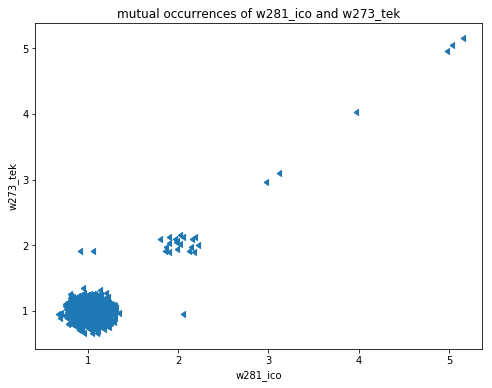

In [9]:
ico, tek = "w281_ico", "w273_tek"
plt.figure(figsize=(8,6))
scatter_jitter(news_train[ico], news_train[tek], jitter=0.5)
plt.xlabel(ico)
plt.ylabel(tek)
plt.title("mutual occurrences of {} and {}".format(ico, tek))
plt.show()

- the two features are closely correlated
- the validity of Naive Bayes is questioned since the assumption of independence does not appear correct in this instance
- these two words may be separate, but perhaps they tend to appear together as part of a compound word, in which case they are **not** independent, and assuming so removes this information

### ========== Question 2.4 --- [7 marks] ==========
1. [Text] What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of?*. 
1. [Code] Estimate the baseline performance on the *training* data in terms of classification accuracy.

- a reasonable baseline is a constant value - only picking one class - which will yield ~20% accuracy for an even distribution of 5 classes
- if Naive Bayes has accuracy above 20%, then it is actually performing better than random chance, a sign that it has indeed found the pattern

In [10]:
from sklearn.dummy import DummyClassifier

one_trick_pony_clf = DummyClassifier(strategy="most_frequent") # achieve highest accuracy with most frequent occurrence
one_trick_pony_clf.fit(news_train.loc[:, news_train.columns != "class"], news_train["class"]) # remove column "class" from training data

one_trick_pony_preds = one_trick_pony_clf.predict(news_train.loc[:, news_train.columns != "class"])

print("Dummy classifier (testing set) accuracy: {0:2.3%}".format(accuracy_score(news_train["class"], one_trick_pony_preds)))

Dummy classifier (testing set) accuracy: 21.296%


<a id='question_2_5'></a>
### ========== Question 2.5 --- [12 marks] ==========

1. [Code] Fit a Gaussian Naive Bayes model to the cleaned dataset. 

1. [Code] Report the classification accuracy on the **training** dataset and plot a Confusion Matrix for the result (labelling the axes appropriately).

1. [Text] Comment on the performance of the model. Is the accuracy a reasonable metric to use for this dataset?


*Hint: You may make use of utility functions we provided, as well as an sklearn method for computing confusion matrices*

In [11]:
# remove column "class" from training data
nb_clf = GaussianNB().fit(news_train.loc[:, news_train.columns != "class"], news_train["class"])

GaussianNB (training set) accuracy: 87.804%


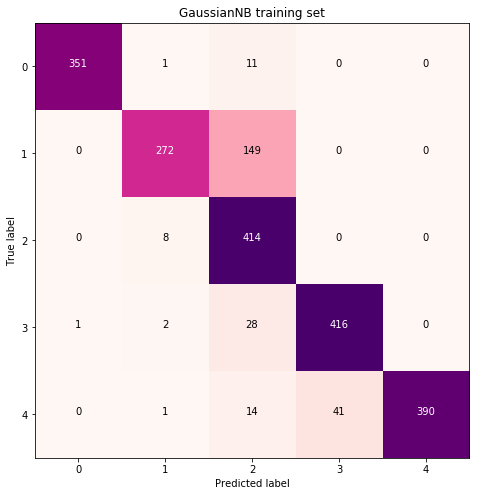

In [12]:
import itertools  # used for the plot below

preds = nb_clf.predict(news_train.loc[:, news_train.columns != "class"])           # remove column "class" from training data

print("GaussianNB (training set) accuracy: {0:2.3%}".format(accuracy_score(news_train["class"], preds))) # show accuracy

cm = confusion_matrix(news_train["class"], preds)

def plot_cm(cm):
    """
    utility to plot confusion matrix with values in cells
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, cmap="RdPu")

    # ---- from sklearn docs / examples
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    # ----

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_cm(cm)

plt.title("GaussianNB training set")

plt.show()


- the model is relatively fast
- good accuracy to start with (even though this is the same data it's trained with)
- accuracy is a valid metric due to relatively even class distributions

### ========== Question 2.6 --- [3 marks] ==========

[Text] Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

- as mentioned in the description, classes _2_ and *3* are closely related, so it explains the large number in $(1, 2)$
- downward diagonal line expected due to high 87% accuracy is present

### ========== Question 2.7 --- [12 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). 

1. [Code] Use the classifier you trained in Question [2.5](#question_2_5) (i.e. on the cleaned dataset) and test its performance on the test dataset. Display classification accuracy and plot a confusion matrix of the performance on the test data. 

1. [Code] Also, reevaluate the performance of the baseline on the test data.

1. [Text] In a short paragraph (3-4 sentences) compare and comment on the results with (a) the training data and (b) the baseline (on the test data).

GaussianNB (testing set) accuracy: 82.031%


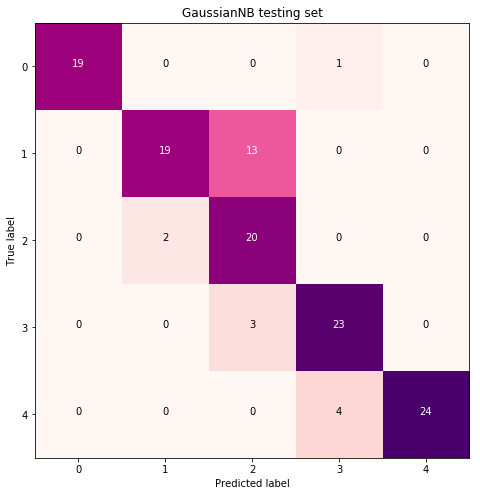

In [13]:
preds = nb_clf.predict(news_test.loc[:, news_test.columns != "class"])

cm = confusion_matrix(news_test["class"], preds)

print("GaussianNB (testing set) accuracy: {0:2.3%}".format(accuracy_score(news_test["class"], preds))) # 

plot_cm(cm)

plt.title("GaussianNB testing set")

plt.show()

In [14]:
preds = one_trick_pony_clf.predict(news_test.loc[:, news_test.columns != "class"])

print("Dummy classifier (testing set) accuracy: {0:2.3%}".format(accuracy_score(news_test["class"], preds)))

Dummy classifier (testing set) accuracy: 20.312%


(a)
- GaussianNB provides ~87% accuracy on the **training** data, and ~82% accuracy on the **testing** data, so fairly successful
- this approach is useful for this type of data, going from a 1 in 5 baseline, to over 4 in 5 correct matches

(b)
- Dummy classifier performs just about the same at ~20% accuracy, which is to be expected given the uniform distribution of classes
- Dummy is useful in validating that GaussianNB actually performs far better than random chance

### ========== Question 2.8 --- (LEVEL 11) --- [7 marks] ==========
1. [Code] Fit a Gaussian Naive Bayes model to the original raw dataset (including the outliers) and test its performance on the **test** set. 

1. [Text] Comment on the output and explain why or why not cleaning affects the classifier.

In [15]:
# (1) # Your Code goes here:

(2) ***Your answer goes here:***

### ========== Question 2.9 --- (LEVEL 11) --- [3 marks] ==========

In this exercise we have fitted a Gaussian Naive Bayes classifier to the data (i.e. the class conditional densities are Gaussians). However, this is not ideally suited to our dataset. Can you explain why this is so? what kind of Naive Bayes model would you employ to this kind of data?

***Your answer goes here:***